## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

**There are 294,478 rows in the dataset.**

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**There are 290,584 unique users in the dataset.**

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

**About 12% of users were converted.**

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

**There are 3893 rows where the treatment group and landing page, new page do not match.**

f. Do any of the rows have missing values?

In [7]:
df.isnull().any() 

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

There are 0 rows with missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Ensure that both cases are handled
 
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") and (group != "treatment" and landing_page == "old_page")').index)

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

**There are 290,584 unique user id's in df2.**

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**User ID 773192 has a duplicate data in dataset.**

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [13]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop([1899])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

b. Given that an individual was in the `control` group, what is the probability they converted?

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2.converted.mean()

0.11959708724499628

**The probability of an individual converting is 0.1196 regardless of the page they receive.** 

In [16]:
con_prob = df2.query('group == "control"')['converted'].mean() #converted probability given in control group
con_prob

0.1203863045004612

**Given the individual was in the control group, there is 0.12 probability they converted.**

In [17]:
treat_prob = df2.query('group == "treatment"')['converted'].mean() #converted probability given in treatment group
treat_prob

0.11880806551510564

**Given the individual was in the treatment group, there is 0.119 probability they converted.**

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()[0]/df2['landing_page'].count()

0.50006194422266881

**There is 0.50 probability the individual received the new page.**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Given the results from the probability statements above, there is not sufficient evidence to conclude that the new treatment page leads to more conversions. You see that if the individual was in the control group, there was a 0.12 probability they converted, and if they were in the treatment group, there was a 0.119 probability the converted. There was also a 0.50 chance that an individual received the new page, which you can say is fair/normal seeing there was only two options. So you can see that despite which group they were in, there was a mere 0.15% difference in conversion rates- favouring the control group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \geq 0$$
$$H_1: p_{old} - p_{new} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
p_0 = 1 - p_new #probability of no conversion

new_page_converted = np.random.choice(2, size=n_new, p=[p_0, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
p_o = 1 - p_old #probability of no conversion

old_page_converted = np.random.choice(2, size=n_old, p=[p_o, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new - p_old


0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
new_page_converts = np.random.binomial(n_new, p_new, 10000)/n_new

old_page_converts = np.random.binomial(n_old, p_old, 10000)/n_old

p_diffs = new_page_converts - old_page_converts
p_diffs

array([  6.86194661e-04,  -4.90695279e-04,   8.23691597e-04, ...,
        -2.87240669e-03,  -7.06694747e-05,   7.82554048e-04])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

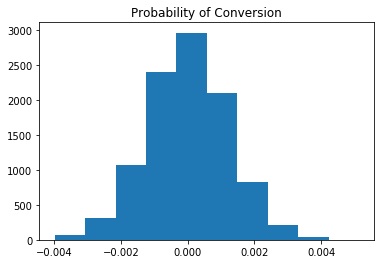

In [27]:
plt.hist(p_diffs)
plt.title('Probability of Conversion');

**The histogram is like expected, a normal distribution.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
actual_diff = treat_prob - con_prob
actual_diff

-0.0015782389853555567

In [29]:
(p_diffs > actual_diff).mean()

0.90490000000000004

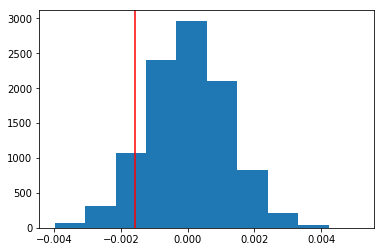

In [30]:
plt.hist(p_diffs)
plt.axvline(actual_diff, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Calculating the portion of conversion in our sampling distribution that is greater than the actual conversion difference, was a result of 0.9057. The value above of 0.9057 is called the p-value. The p-value is the probability of observing our statistic if our null hypothesis is true, and is one of the ways to determine statistical significance of our data. Earlier, a Type I error rate ($\alpha$) of 5% (0.05) was set, and if the p-value is less than or equal to our $\alpha$ value, it would be enough evidence to reject the null hypothesis. Our p-value is much greated than $\alpha$, so we fail to reject our null hypothesis, which means that there is no difference between the new and old pages.** 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([convert_new, convert_old])
nob = np.array([n_new, n_old])

zstat, pval = proportions_ztest(count, nob, alternative='larger') #alternative = 'larger' used because alt hypothesis is p_new>p_old
zstat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is -1.3109 and the p-value is 0.905. Our p-value agrees with our finding in part j. The z-score also known as a standard score, is a value that represents how far away a data point is from the mean. The z-score can be thought of as how many standard deviations above or below a population mean a data point is, and is a way to compare data to a normal population. We calculated a z-score of -1.3109 which tells us that our data values are -1.3109 standard deviations below the mean.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression would be suitable for performing this case as we are only predicting 2 outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
import statsmodels.api as sm 

df2['intercept'] = 1 #create intercept

df2[['ab_group_drop', 'ab_group']] = pd.get_dummies(df2['group']) #create dummy variable for 'group'
df2 = df2.drop(['ab_group_drop'], axis=1) #drop column as only one is needed for 1- treatment, adn 0- control

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_group']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary2() #suddenly results.summary() results error:  "module 'scipy.stats' has no attribute 'chisqprob'" 
                   #so solution to input results.summary2() instead

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-02-18 21:11 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_group     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190 so we have failed to reject the null hypothesis. The null hypothesis in our regression model is that the old page is greater than or equally as effective for conversion than the new page. We can also say that ab_page (being in treatment or control group) is not statistically significant for predicting if the new page will convert an individual or not. 
In Part II, our test was comparing the conversion rates between each landing page- whether it was the old page or the new page, where our dependent variable was the conversion and the independent as the landing page. Here in our logistic regression model, we are comparing the difference in two samples.** 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is important to consider other factors to our regression model because we will be able to get a better understanding for our conversion rates. Other factors may include time, gender, or target market, that may help in interpreting our results and coming to a more accurate conclusion. Disadvantages for adding additional terms into our regression model may be that you run into terms that have no correlation to your output variable which would have no sense when interpreting your results; so ensuring that all terms affect your output is important.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries_df = pd.read_csv('countries.csv')
countries_df.head() #we have 2 columns in our initial dataframe, user id and country

countries_df.nunique() #290584 unique user id's, and 3 unique countries

countries_df.country.unique() #countries include the UK, US, CA

sum(countries_df.duplicated()) #0 duplicates

0

In [49]:
df_new = df2.join(countries_df.set_index('user_id'), on='user_id') #join countries df to df2, now under df_new

In [50]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country']) #each country has own column

In [52]:
logit2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']]) #CA is our "baseline"
results2 = logit2.fit()
results2.summary2() #same error as above, use summary2() instead

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-02-18 21:13 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [53]:
np.exp(0.0507), np.exp(0.0408)

(1.0520072437650141, 1.0416437559600236)

**Using Canada- CA as our baseline, when we plot a regression model for just countries and their effect on conversion, we see that both p-values are above the $\alpha$ limit so we cannot say that where the individual resides is a statistically significant factor in conversion. 
We see that there is a only a 1.052 times the individual converted if present in the UK, and only 1.042 times the individual converted if present in the US.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
logit3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_group', 'UK', 'US']]) #CA is our "baseline"
results3 = logit3.fit()
results3.summary2() #same error

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-02-18 21:13 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_group      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [56]:
np.exp(-0.0149), np.exp(0.0506), np.exp(0.0408), 1/np.exp(-0.0149)

(0.9852104557227469,
 1.0519020483004984,
 1.0416437559600236,
 1.0150115583846535)

In [57]:
print(df_new['timestamp'].min())
df_new['timestamp'].max() #the experiment was only run for 24 days

2017-01-02 13:42:05.378582


'2017-01-24 13:41:54.460509'

**Our p-values for the landing page and countries are all greater than 0.05, so again these terms are not statistically significant in the conversion rates. Comparing this summary with the other summaries that only consisted of country location or ab_group, we see that the p-values have stayed consistent. We can instead use the coefficient to make conclusions as well. Here we see that if the individual was in a 'treatment' group, that they are only 0.98 times more likely to have converted, holding all other factors constant. If the individual was from the UK, they were 1.05 times more likely to have converted than if they were living in CA (our baseline), and living in the US had only a 1.04 time more likely chance to have converted.**

Having the timestamp available in our dataset as well, we will now see if time influenced the conversion rate.

In [83]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp']) #convert timestamp str to datetime

df_new['hour'] = df_new.timestamp.dt.hour
df_new['minute'] = df_new.timestamp.dt.minute #split timestamp into hour and minutes

df_new['time_in_min'] = df_new['hour']*60 + df_new['minute']

In [87]:
# There are 24hours in a day, I have chosen to split these hours into 4 sections

bin_edges = [0, 6*60, 12*60, 18*60, 24*60]
bin_labels = ['Overnight', 'Morning', 'Afternoon', 'Evening']

df_new['time_of_day'] = pd.cut(df_new['time_in_min'], bin_edges, labels=bin_labels)

In [89]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group,country,CA,UK,US,time,hour,minute,time_in_min,time_of_day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1331,22,11,1331,Evening
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,481,8,1,481,Morning
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1015,16,55,1015,Afternoon
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1108,18,28,1108,Evening
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,112,1,52,112,Overnight


In [92]:
df_new[['Overnight', 'Morning', 'Afternoon', 'Evening']] = pd.get_dummies(df_new['time_of_day'])

In [93]:
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_group,country,CA,UK,US,time,hour,minute,time_in_min,time_of_day,Afternoon,Evening,Morning,Overnight
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1331,22,11,1331,Evening,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,481,8,1,481,Morning,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1015,16,55,1015,Afternoon,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1108,18,28,1108,Evening,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,112,1,52,112,Overnight,0,0,0,1


In [100]:
logit4 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_group', 'UK', 'US', 'Evening', 'Morning', 'Afternoon']])
results4= logit4.fit()
results4.summary2()

Optimization terminated successfully.
         Current function value: 0.366094
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-02-18 21:51 AIC:              212776.0828
No. Observations:   290584           BIC:              212850.1403
Df Model:           6                Log-Likelihood:   -1.0638e+05
Df Residuals:       290577           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0630    0.0285  -72.4724  0.0000  -2.1188  -2.0072
ab_group      -0.0149    0.0114   -1.3027  0.1927  -0.0373   0.0075
UK             0.0507    0.0284    1.7866  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5171  0.1292  -0.0119   0.0935
Evening        0.0476    0.0162    2.9314  0.0034   0.0158   0.0794
Morning        0.0420    0.0162    2.5852  0.0097   0.0102   0.0738
Afternoon      0.0417    0.0162    2.5684  0.0102   0.0099   0.0735
==================================================================

"""

In [99]:
print(df_new.Overnight.sum())
print(df_new.Afternoon.sum())
print(df_new.Morning.sum())
print(df_new.Evening.sum())

72583
72808
72583
72397


Looking at our results with the addition of time, we see that the time of day whether Evening, Morning, or Afternoon seem to have a p-value of 0.0034, 0.0097 and 0.0102 respectively, which is less than the $\alpha$ value of 0.05- deeming these traits statistically significant. I used Overnight (users online from 12:00am to 6:00am as our baseline). 

## Conclusion

These coefficients and p-values are consistent in our null hypothesis which we rejected to fail, so in conclusion we can confidently say that the conversion rate with the old page is equal or greater than the new page. This can provide guidance to the e-commerce web company in making their decision about implementing a new page or staying with the old one. Other factors like cost of the new page or time spent in changing to the new page should be applied in making the decision as well. Looking at the results of our data, I would say that keeping the old page would be sufficient. 

## Limitations

There come some difficulties with A/B testing that should be noted as well: 
- If the experiment was run longer than the 24 days, perhaps the difficulty of change aversion on users may subside and we would see a different outcome.
- Were there any other factors not in the data that are a better metric for making the ultimate decision?
- Is conversion rate practically significant? Do we have data showing how often users are on the site after they have converted? Data results say to keep the old page, but would users like the new page after converting for other features?
- We did not know the demographic of the treatment and control groups. Having a diverse but same group of people between the two groups is important, and we did not have that information.


<a id='conclusions'></a>

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0